<h3 style = "color:green"><center><i>IMPLIMENTATION OF ML-CLASSIFICATION MODELS<i></center></h3>

<h3 style = "color:BlueViolet"><left><i>Importing the required Libraries and Loading the Dataset<i></left></h3>

In [1]:
# Importing required libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
# Loading the dat set

data = pd.read_csv(r"C:\\PYTHON\\PANDAS\\train.csv")

In [3]:
# Displaying the Dataset
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<h3 style = "color:BlueViolet"><left><i>Copying the Dataset<i></left></h3>

In [4]:
# Copying the dataset

df1 = data.copy()

In [5]:
df1.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


<h3 style = "color:BlueViolet"><left><i>Deleting the Unwanted columns from the Dataset<i></left></h3>

In [6]:
# Deleting the Unwanted columns from the data set

del df1["Loan_ID"]

<h3 style = "color:BlueViolet"><left><i>Removing Special Charectors from the Feature "Dependents"<i></left></h3>

In [7]:
# Seperating the unwanted symbols from the feature "Dependents"
import warnings 
warnings.filterwarnings("ignore")

df1['Dependents'] = df1['Dependents'].str.replace("+","")

In [8]:
df1["Dependents"]

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

- By doing the above step we removed "+" signs from the column: ["Dependents"]

In [9]:
# Getting the shape of the data

df1.shape

(614, 12)

- We have 12 columns and 614 Rows in our dataset after deleting the column "Loan_ID"

In [10]:
# Finding the datatypes of the data set

df1.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- We have Seven categorical columns and Four Continuous types and One Discrete type of columns

In [11]:
# Getting Metadata information of the given Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<h3 style = "color:BlueViolet"><left><i>Finding the "Statistics" of the Continuous Features<i></left></h3>

In [12]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- From the above information it is clear that The max income of applicant is 81000 and minimum income is 150 rupees
- The Maximum Coapplicant-income is 41667 and minimum is 0
- The Maximum Loan Amount is 700 and minimum is 9 rupees

  - There is Maximum chances to get loan , applicant who has high income or applicant who has his coapplicant's income high

In [13]:
df1.mean()                    # Mean from Continuous columns

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [14]:
df1.median()                 # Median from the Continuous columns

Dependents              0.0
ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [15]:
df1.mode().sum()             # Mode from each column of the Dataset

Gender                    Male
Married                    Yes
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome           2500
CoapplicantIncome          0.0
LoanAmount               120.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Loan_Status                  Y
dtype: object

In [16]:
df1.std()                   # Standard deviation from the Continuous columns

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

In [17]:
df1.var()                   # Variance of the Continuous columns

ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.325190e+03
Loan_Amount_Term     4.240668e+03
Credit_History       1.331362e-01
dtype: float64

In [18]:
from scipy.stats import skew         # importing skew module to get the skewness of the Continuous Data
from scipy.stats import kurtosis     # importing kutosis module to get the kurtosis of the Continuous Data

In [19]:
df1.skew()

Dependents           0.978647
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [20]:
df1.kurtosis()

Dependents           -0.421655
ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

<h3 style = "color:BlueViolet"><left><i>Finding Minimum, Maximum, Range From the Dataset<i></left></h3>

In [21]:
df1.min()

Education            Graduate
ApplicantIncome           150
CoapplicantIncome         0.0
LoanAmount                9.0
Loan_Amount_Term         12.0
Credit_History            0.0
Property_Area           Rural
Loan_Status                 N
dtype: object

In [22]:
df1.max()

Education            Not Graduate
ApplicantIncome             81000
CoapplicantIncome         41667.0
LoanAmount                  700.0
Loan_Amount_Term            480.0
Credit_History                1.0
Property_Area               Urban
Loan_Status                     Y
dtype: object

- We can't get range from String objects. So, now we will seperate Continuou feature to get range of our data

In [23]:
# Seperating out the Continuous Features to get Range of our data
df2 = df1[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]

In [24]:
_range = df2.max() - df2.min()
_range

ApplicantIncome      80850.0
CoapplicantIncome    41667.0
LoanAmount             691.0
Loan_Amount_Term       468.0
Credit_History           1.0
dtype: float64

<h3 style = "color:BlueViolet"><left><i>Value_Count on Categorical Features<i></left></h3>

In [25]:
df1.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [26]:
df1.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [27]:
df1.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [28]:
df1.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [29]:
df1.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
df1.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [31]:
df1.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

- From the above information it is clear that females are 1/3 rd of males. It seems to be imbalanced data

<h3 style = "color:blueviolet"><left><i>Checking for Missing Values<i></left></h3>

In [32]:
df1.isnull().sum()              # Getting Missing values count from each column

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<h3 style = "color:BlueViolet"><left><i>Filling Missing Categorical Values with mode()<i></left></h3>

In [33]:
df1['Gender'].fillna(df1.Gender.mode()[0], inplace = True)

In [34]:
df1["Married"].fillna(df1.Married.mode()[0], inplace = True )

In [35]:
df1["Dependents"].fillna(df1.Dependents.mode()[0], inplace = True )

In [36]:
df1["Self_Employed"].fillna(df1.Self_Employed.mode()[0], inplace = True )

In [37]:
df1["Credit_History"].fillna(df1.Credit_History.mode()[0], inplace = True )

In [38]:
df1["LoanAmount"].fillna(df1.LoanAmount.mode()[0], inplace = True )

In [39]:
df1["Loan_Amount_Term"].fillna(df1.Loan_Amount_Term.mode()[0], inplace = True )

In [40]:
df1.isnull().sum()              # Re_Checking Missing values count from each column After Filled them

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h3 style = "color:BlueViolet"><left><i>Applying Label Encoding On Categorical Features<i></left></h3>

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoder = LabelEncoder()

In [43]:
df1["Gender"] = encoder.fit_transform(df1["Gender"])   # Encoding "Gender" Column

In [44]:
print(df1["Gender"].unique())                          # Getting unique values of "Gender"

[1 0]


In [45]:
df1["Married"] = encoder.fit_transform(df1["Married"]) # Encoding "Married" Column

In [46]:
print(df1["Married"].unique())                         # Getting unique values of "Married"

[0 1]


In [47]:
df1["Education"] = encoder.fit_transform(df1["Education"]) # Encoding "Education" column

In [48]:
print(df1["Education"].unique())                           # Getting unique values of "Education"

[0 1]


In [49]:
df1["Self_Employed"] = encoder.fit_transform(df1["Self_Employed"]) # Encoding "Self_Employed"

In [50]:
print(df1["Self_Employed"].unique())                               # Getting unique values of "Self_Employed"

[0 1]


In [51]:
df1["Loan_Amount_Term"] = encoder.fit_transform(df1["Loan_Amount_Term"]) # Encoding "Loan_Amount_Term"

In [52]:
print(df1["Loan_Amount_Term"].unique())                                  # Getting unique values of "Loan_Amount_Term"

[8 4 6 5 2 7 9 1 3 0]


In [53]:
df1["Property_Area"] = encoder.fit_transform(df1["Property_Area"]) # Encoding "Property_Area"

In [54]:
print(df1["Property_Area"].unique())                               # Getting unique values of "Property_Area"

[2 0 1]


In [55]:
df1["Loan_Status"] = encoder.fit_transform(df1["Loan_Status"]) # Encoding "Loan_Status"

In [56]:
print(df1["Loan_Status"].unique())                             # Getting unique values of "Loan_Status"

[1 0]


In [57]:
df1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,8,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1


<h3 style = "color:BlueViolet"><left><i>Checking for Outliers in Continuous Data<i></left></h3>

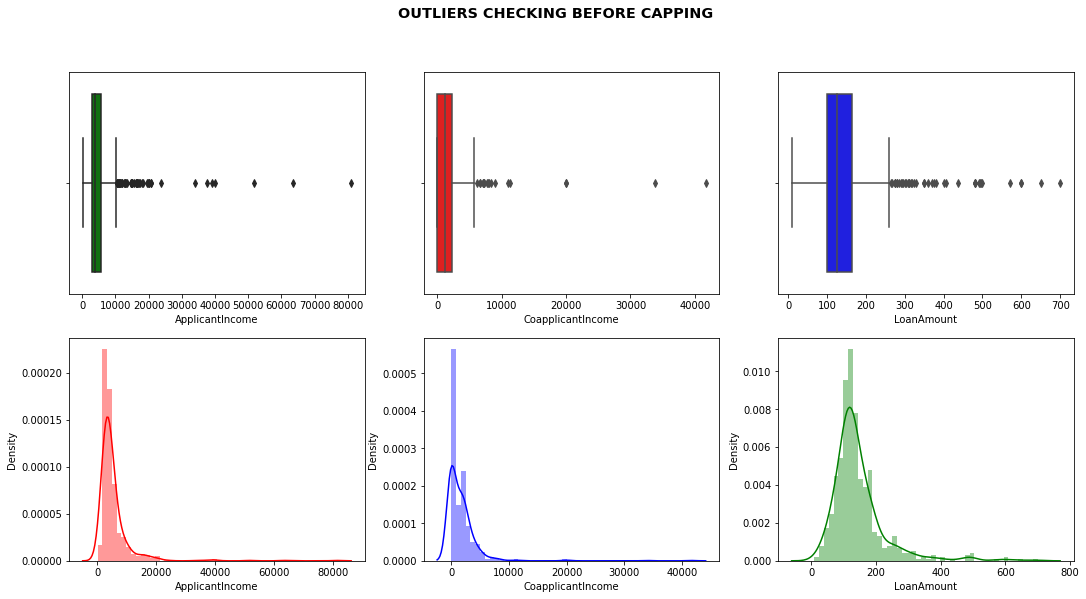

In [58]:
plt.figure(figsize = (18,9))

plt.suptitle("OUTLIERS CHECKING BEFORE CAPPING",fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,3,1)
sns.boxplot(df1["ApplicantIncome"],color = "green")
plt.subplot(2,3,4)
sns.distplot(df1["ApplicantIncome"],color = "red")
plt.subplot(2,3,2)
sns.boxplot(df1["CoapplicantIncome"], color = "red")
plt.subplot(2,3,5)
sns.distplot(df1["CoapplicantIncome"], color = "blue")
plt.subplot(2,3,3)
sns.boxplot(df1["LoanAmount"],color = "blue")
plt.subplot(2,3,6)
sns.distplot(df1["LoanAmount"], color = 'green')
plt.show()

<h3 style = "color:BlueViolet"><left><i>Outliers Capping Using Inter quartile Range Method<i></left></h3>

In [59]:
Q1 = df1["ApplicantIncome"].quantile(0.25)

Q3 = df1["ApplicantIncome"].quantile(0.75)

IQR = Q3 - Q1

print(IQR)

2917.5


In [60]:
upperlimit = Q3 + 1.5 * IQR

In [61]:
lowerlimit = Q1 - 1.5 * IQR

In [62]:
df1["ApplicantIncome"] = np.where(df1["ApplicantIncome"] > upperlimit, upperlimit,
                         np.where(df1["ApplicantIncome"] < lowerlimit, lowerlimit,
                                  df1["ApplicantIncome"]))

In [63]:
Q11 = df1["CoapplicantIncome"].quantile(0.25)

Q33 = df1["CoapplicantIncome"].quantile(0.75)

IQR1 = Q33 - Q11

print(IQR1)

2297.25


In [64]:
upperlimit1 = Q33 + 1.5 * IQR1

In [65]:
lowerlimit1 = Q11 - 1.5 * IQR1

In [66]:
df1["CoapplicantIncome"] = np.where(df1["CoapplicantIncome"] > upperlimit1, upperlimit1,
                           np.where(df1["CoapplicantIncome"] < lowerlimit1, lowerlimit1,
                                    df1["CoapplicantIncome"]))

In [67]:
Q111 = df1["LoanAmount"].quantile(0.25)

Q333 = df1["LoanAmount"].quantile(0.75)

IQR2 = Q333 - Q111

print(IQR2)

64.5


In [68]:
upperlimit2 = Q333 + 1.5 * IQR2

In [69]:
lowerlimit2 = Q111 - 1.5 * IQR2

In [70]:
df1["LoanAmount"] = np.where(df1["LoanAmount"] > upperlimit2, upperlimit2,
                    np.where(df1["LoanAmount"] < lowerlimit2, lowerlimit2,
                             df1["LoanAmount"]))

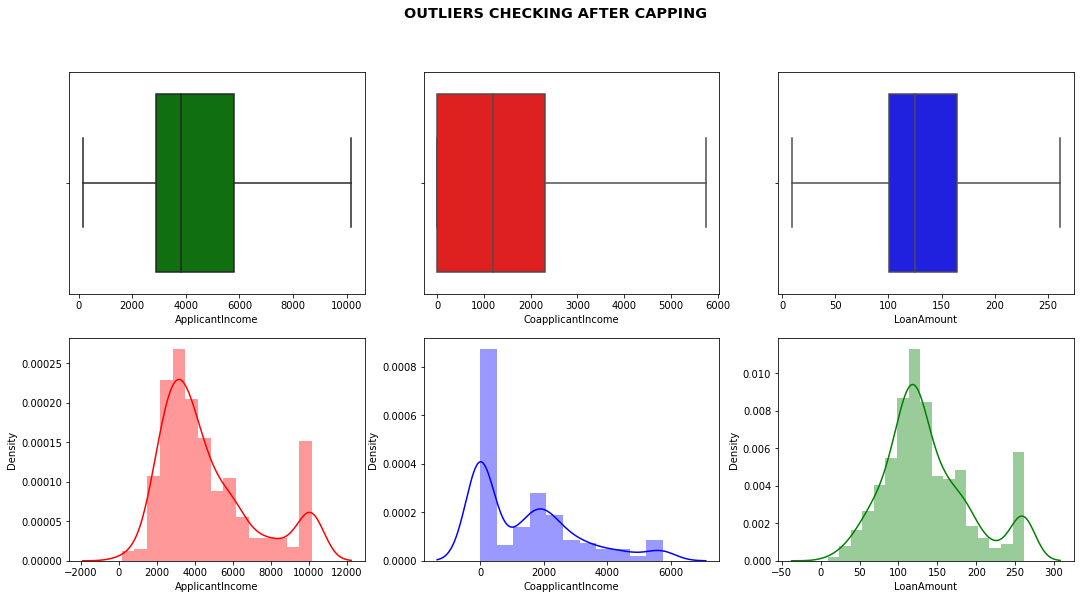

In [71]:
plt.figure(figsize = (18,9))

plt.suptitle("OUTLIERS CHECKING AFTER CAPPING",fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,3,1)
sns.boxplot(df1["ApplicantIncome"],color = "green")
plt.subplot(2,3,4)
sns.distplot(df1["ApplicantIncome"],color = "red")
plt.subplot(2,3,2)
sns.boxplot(df1["CoapplicantIncome"], color = "red")
plt.subplot(2,3,5)
sns.distplot(df1["CoapplicantIncome"], color = "blue")
plt.subplot(2,3,3)
sns.boxplot(df1["LoanAmount"],color = "blue")
plt.subplot(2,3,6)
sns.distplot(df1["LoanAmount"], color = 'green')
plt.show()

<h3 style = "color:BlueViolet"><left><i>Dealing with outliers in categorical data<i></left></h3>

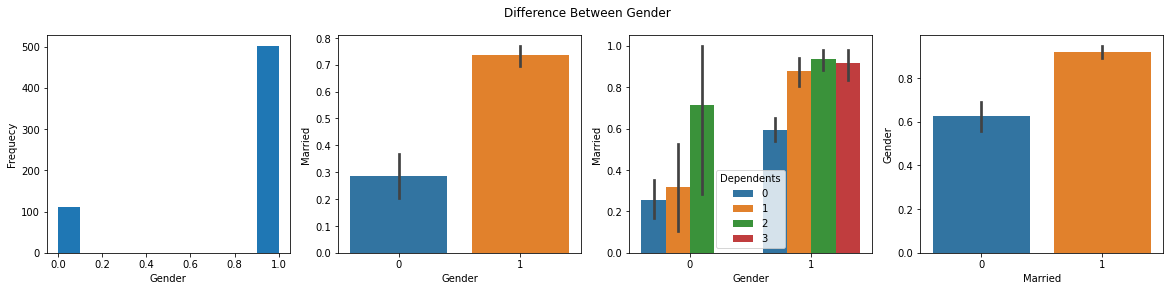

In [72]:
plt.figure(figsize = (20,4))
plt.suptitle("Difference Between Gender")
plt.subplot(1,4,1)
ax = df1["Gender"].plot.hist()
ax.set_ylabel("Frequecy")
ax.set_xlabel("Gender")
plt.subplot(1,4,2)
sns.barplot(x = "Gender", y = "Married", data = df1)
plt.subplot(1,4,3)
sns.barplot(x = "Gender", y = "Married", data = df1, hue = "Dependents", )
plt.subplot(1,4,4)
sns.barplot(x = "Married", y = "Gender", data = df1)
plt.show()

- Here we can see that the count of "Female" is very less than "Male" and can be considerd as outlier

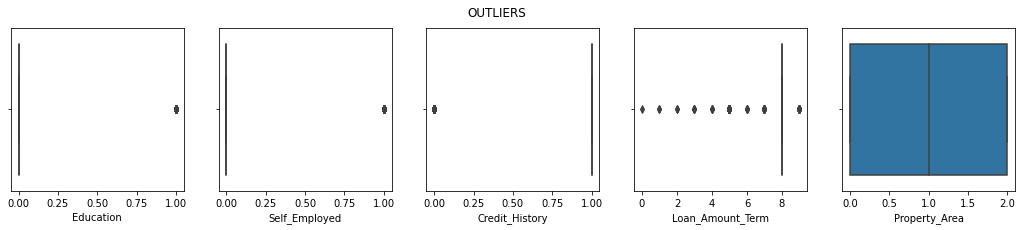

In [73]:
plt.figure(figsize = (18,3))
plt.suptitle("OUTLIERS")
plt.subplot(1,5,1)
sns.boxplot(df1["Education"])
plt.subplot(1,5,2)
sns.boxplot(df1["Self_Employed"])
plt.subplot(1,5,3)
sns.boxplot(df1["Credit_History"])
plt.subplot(1,5,4)
sns.boxplot(df1["Loan_Amount_Term"])
plt.subplot(1,5,5)
sns.boxplot(df1["Property_Area"])
plt.show()


- From the above plots it is conformed that categorical data also hsa outliers. The reasons for being outliers in the categorical data such as fault collection of the data or categories can be rare and hard to collect data about it. 

  The following are the ways to dealing with outliers in categorical data:
         
         1) Retention : This process involves modelling the outliers with the other data.
         
         2) Exclusion : This method involves techniques to exclude the outliers from the data.
         
         3) Replacement : Sometimes it happens that the data that is collected has outlier values but as a category, they are similar to the other major categories. In such cases, we can replace the outliers with similar categories. We can measure the similarity between the data using the measures like euclidean distance, cosine similarity, Manhattan distance etc.
         
         4) Sampling : Outliers in the categorical data can also be said to the problem of class imbalance. This means that the data for every class are not in a similar proportion. In such a situation, we use some of the sampling techniques such as downsampling, oversampling and SMOTE analysis. Here we mainly increase or decrease the data points by knowing the importance of the categories in the modelling. 
         
- Here I have choosen DownSampling Technique To Balance the Data

<h3 style = "color:BlueViolet"><left><i>Down-Sampling of Data to make the data Balanced<i></left></h3>

In [74]:
df2 = df1.loc[df1['Gender'] == 0]

In [75]:
df2.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,0,0,0,0,0,3510.0,0.0,76.0,8,0.0,2,0
29,0,0,2,0,0,3750.0,2083.0,120.0,8,1.0,1,1
37,0,1,0,0,0,3667.0,1459.0,144.0,8,1.0,1,1


In [76]:
df3 = df1.loc[df1['Gender'] == 1]

In [77]:
df3.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,120.0,8,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,8,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,8,1.0,2,1


In [78]:
df4 = df3.iloc[0:112, :]

In [79]:
df4.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,120.0,8,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,8,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,8,1.0,2,1


In [80]:
df5 = pd.concat([df2,df4], axis = 0)

In [81]:
df5

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,0,0,0,0,0,3510.00,0.0,76.0,8,0.0,2,0
29,0,0,2,0,0,3750.00,2083.0,120.0,8,1.0,1,1
37,0,1,0,0,0,3667.00,1459.0,144.0,8,1.0,1,1
45,0,0,0,0,0,3410.00,0.0,88.0,8,1.0,2,1
48,0,1,0,0,0,2645.00,3440.0,120.0,8,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,1,0,0,0,6080.00,2569.0,182.0,8,1.0,0,0
130,1,0,0,0,1,10171.25,0.0,261.5,9,1.0,2,1
131,1,0,0,0,0,2014.00,1929.0,74.0,8,1.0,2,1
132,1,0,0,0,0,2718.00,0.0,70.0,8,1.0,1,1


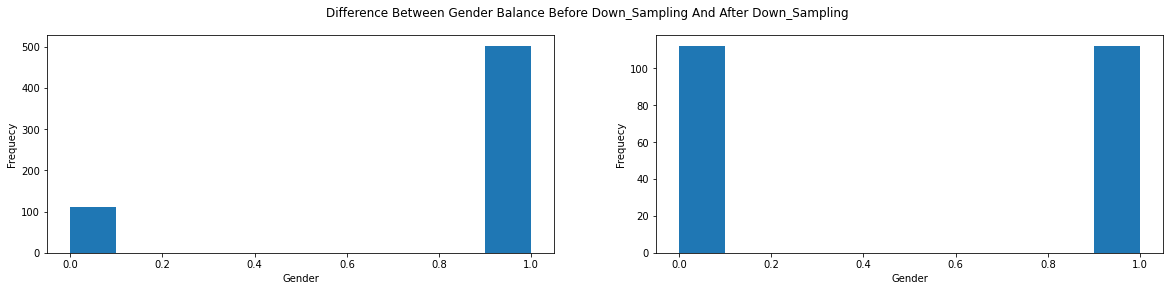

In [82]:
plt.figure(figsize = (20,4))
plt.suptitle("Difference Between Gender Balance Before Down_Sampling And After Down_Sampling")
plt.subplot(1,2,1)
ax = df1["Gender"].plot.hist()
ax.set_ylabel("Frequecy")
ax.set_xlabel("Gender")
plt.subplot(1,2,2)
ax = df5["Gender"].plot.hist()
ax.set_ylabel("Frequecy")
ax.set_xlabel("Gender")
plt.show()

<h3 style = "color:BlueViolet"><left><i>Correlation Comparison of Balanced and Imbalanced Data<i></left></h3>

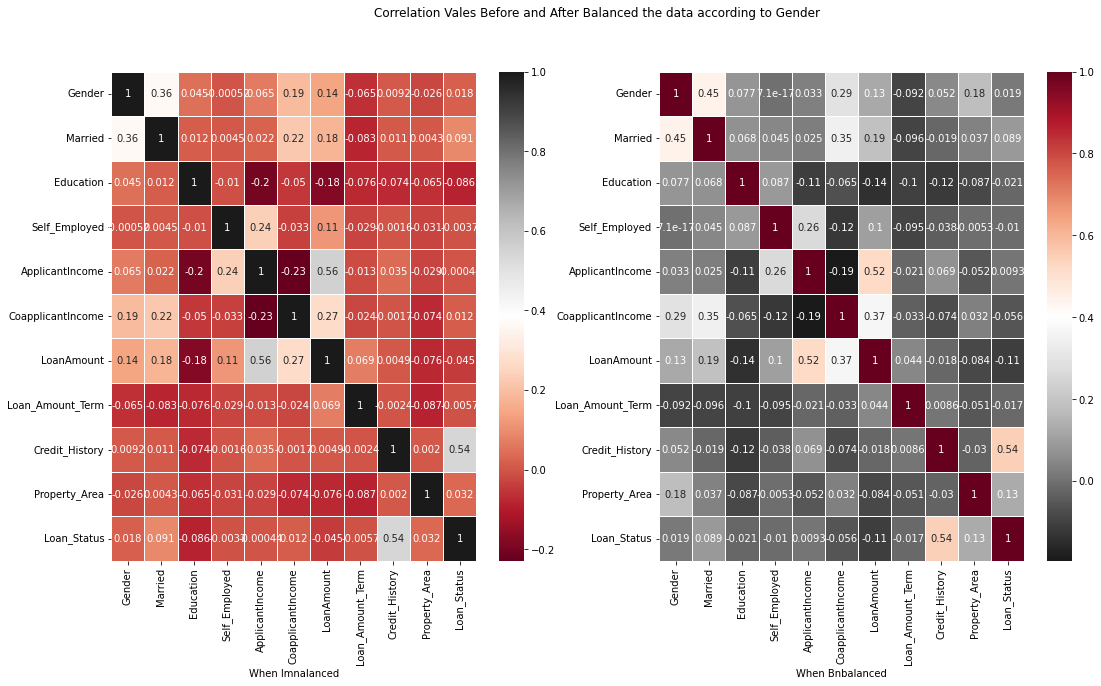

In [83]:
plt.figure(figsize = (18,9))
plt.suptitle("Correlation Vales Before and After Balanced the data according to Gender")
plt.subplot(1,2,1)
corr = df1.corr()
ax = sns.heatmap(corr, cmap='RdGy', annot=True, linewidths= 1.0)
ax.set_xlabel("When Imnalanced")
plt.subplot(1,2,2)
corr = df5.corr()
ax = sns.heatmap(corr, cmap='RdGy_r', annot=True, linewidths= 1.0)
ax.set_xlabel("When Bnbalanced")
plt.show()

- From the above information it is clear that Correlation Values improved after balanced the Data

<h3 style = "color:BlueViolet"><left><i>Feature Scalling<i></left></h3>

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scale = MinMaxScaler()

In [86]:
df5["ApplicantIncome"] = scale.fit_transform(np.array(df5["ApplicantIncome"]).reshape(-1,1))

In [87]:
df5["CoapplicantIncome"] = scale.fit_transform(np.array(df5["CoapplicantIncome"]).reshape(-1,1))

In [88]:
df5["LoanAmount"] = scale.fit_transform(np.array(df5["LoanAmount"]).reshape(-1,1))

In [89]:
df5["Loan_Amount_Term"] = scale.fit_transform(np.array(df5["Loan_Amount_Term"]).reshape(-1,1))

In [90]:
df5["Dependents"] = scale.fit_transform(np.array(df5["Dependents"]).reshape(-1,1))

In [91]:
df5["Property_Area"] = scale.fit_transform(np.array(df5["Property_Area"]).reshape(-1,1))

In [92]:
df5

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,0,0,0.000000,0,0,0.331284,0.000000,0.265347,0.875,0.0,1.0,0
29,0,0,0.666667,0,0,0.355377,0.362695,0.439604,0.875,1.0,0.5,1
37,0,1,0.000000,0,0,0.347045,0.254043,0.534653,0.875,1.0,0.5,1
45,0,0,0.000000,0,0,0.321245,0.000000,0.312871,0.875,1.0,1.0,1
48,0,1,0.000000,0,0,0.244447,0.598977,0.439604,0.875,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,1,0.000000,0,0,0.589283,0.447317,0.685149,0.875,1.0,0.0,0
130,1,0,0.000000,0,1,1.000000,0.000000,1.000000,1.000,1.0,1.0,1
131,1,0,0.000000,0,0,0.181102,0.335880,0.257426,0.875,1.0,1.0,1
132,1,0,0.000000,0,0,0.251776,0.000000,0.241584,0.875,1.0,0.5,1


- After Retuning the features i recognized that the column "Dependents" has no imortance, since i wnat to delecte this feature.

In [93]:
del df5["Dependents"]

In [94]:
df5

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,0,0,0,0,0.331284,0.000000,0.265347,0.875,0.0,1.0,0
29,0,0,0,0,0.355377,0.362695,0.439604,0.875,1.0,0.5,1
37,0,1,0,0,0.347045,0.254043,0.534653,0.875,1.0,0.5,1
45,0,0,0,0,0.321245,0.000000,0.312871,0.875,1.0,1.0,1
48,0,1,0,0,0.244447,0.598977,0.439604,0.875,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
129,1,1,0,0,0.589283,0.447317,0.685149,0.875,1.0,0.0,0
130,1,0,0,1,1.000000,0.000000,1.000000,1.000,1.0,1.0,1
131,1,0,0,0,0.181102,0.335880,0.257426,0.875,1.0,1.0,1
132,1,0,0,0,0.251776,0.000000,0.241584,0.875,1.0,0.5,1


<h3 style = "color:BlueViolet"><left><i>Train_Test_Splitting of Data<i></left></h3>

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
features = df5.iloc[:,0 : 10]

In [97]:
x = features
y = df5["Loan_Status"]

In [98]:
x_train , x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.70, shuffle = True)

<h3 style = "color:red"><center><i>MACHINE LEARNING MODELS WITH BALANCED DATASETE<i></center></h3>

<h3 style = "color:Chocolate"><left><i>Logistic Regression<i></left></h3>

In [99]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

In [100]:
model1 = LogisticRegression(random_state = 0)
model1.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [101]:
# Predicting the Test set results
y_pred = model1.predict(x_test)

In [102]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1])

In [103]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred)

In [104]:
cm1 

array([[ 6, 10],
       [ 0, 52]], dtype=int64)

In [105]:
from sklearn.metrics import accuracy_score   # Accuracy score 
ac1 = accuracy_score(y_test, y_pred)

In [106]:
ac1

0.8529411764705882

<h3 style = "color:Chocolate"><left><i>K_Nearest_Neighbor(KNN)<i></left></h3>

In [107]:
# imprt algorithm method name from required libraries
from sklearn.neighbors import KNeighborsClassifier

In [108]:
# create an alogirthm ( same like as function)
model2 = KNeighborsClassifier(n_neighbors =3)

In [109]:
# apply the model on training dataset using fit
model2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [110]:
# Predicting the Model : input variable of testing datset - xtest
y_pred = model2.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1])

In [111]:
#Evaluating the Algorithm
from sklearn.metrics import confusion_matrix
# creating confustion matrix table for TP and TN scenarios
cm2 = confusion_matrix(y_test, y_pred)

In [112]:
cm2

array([[ 4, 12],
       [ 5, 47]], dtype=int64)

In [113]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy for the model by validating y_pred and y_test
ac2 = accuracy_score(y_test, y_pred)

In [114]:
ac2

0.75

<h3 style = "color:Chocolate"><left><i>Support Vector Machine(SVM)<i></left></h3>

In [115]:
# Importing libraries and Method
from sklearn.svm import SVC
# Creating An alogrithm using imported method names
model3 = SVC(kernel = 'poly')

In [116]:
# Apply alogrithm on Training dataset (xtrain , ytrain) by using .fitI()
model3.fit(x_train, y_train)

SVC(kernel='poly')

In [117]:
# Predicting the Test set results by applying on only input variables of
# testind dataset (Xtest)
y_pred = model3.predict(x_test)

In [118]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1])

In [119]:
# Making the Confusion Matrix by validating the predicted and Actual Values
# importing required libraries
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test,y_pred)

In [120]:
cm3

array([[ 5, 11],
       [ 1, 51]], dtype=int64)

In [121]:
from sklearn.metrics import accuracy_score
ac3 = accuracy_score(y_test, y_pred)

In [122]:
ac3

0.8235294117647058

<h3 style = "color:Chocolate"><left><i>Naive Bayes<i></left></h3>

In [123]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train, y_train)

GaussianNB()

In [124]:
y_pred = model4.predict(x_test)

In [125]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1])

In [126]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [127]:
# Making the confusion Matrix
cm4 = confusion_matrix(y_test, y_pred)

In [128]:
cm4

array([[ 5, 11],
       [ 2, 50]], dtype=int64)

In [129]:
# Accuracy score
ac4 = accuracy_score(y_test, y_pred)

In [130]:
ac4

0.8088235294117647

<h3 style = "color:Chocolate"><left><i>Decision Tree<i></left></h3>

In [131]:
# Fitting Decision Tree Classification to the Training set
# step 1 :import libraries and methods
from sklearn.tree import DecisionTreeClassifier
# step 2 : Create an alogrithm using imported methods
model5 = DecisionTreeClassifier(criterion = 'entropy')
# Step3 : applying algorithm on training dataset ( Xtrain , ytrain)
model5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [132]:
# Predicting the Test set results by applying the algorithm only in input
#variables of testing dataset (xtest)
y_pred = model5.predict(x_test)

In [133]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1])

In [134]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred)
cm5

array([[ 5, 11],
       [12, 40]], dtype=int64)

In [135]:
from sklearn.metrics import accuracy_score
ac5 = accuracy_score(y_test, y_pred)

In [136]:
ac5

0.6617647058823529

<h3 style = "color:Chocolate"><left><i>Random Forest<i></left></h3>

In [137]:
# Fitting Random Forest Classification to the Training set
# 1 : Import required libraries and Method for RF
from sklearn.ensemble import RandomForestClassifier
# 2 : create an alogrithm using imported method name
model6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
# Train the model - Training Data (xtrain, ytrain)
model6.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [138]:
# Predicting the Test set results - only on input varabiles of dataset
y_pred = model6.predict(x_test)

In [139]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0])

In [140]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_test, y_pred)

In [141]:
cm6

array([[ 6, 10],
       [ 6, 46]], dtype=int64)

In [142]:
print(model6.feature_importances_)

[0.04001038 0.06452106 0.04238546 0.00892493 0.20461176 0.123071
 0.19002511 0.03421618 0.20592233 0.08631179]


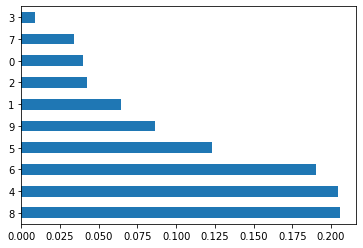

In [143]:
feat_importances = pd.Series(model6.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [144]:
from sklearn.metrics import accuracy_score
ac6 = accuracy_score(y_test, y_pred)

In [145]:
ac6

0.7647058823529411

<h3 style = "color:Chocolate"><left><i>XG BOOST CLASSIFIER<i></left></h3>

In [146]:
from xgboost import XGBClassifier

In [147]:
model7 = XGBClassifier()

In [148]:
model7.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [149]:
y_pred = model7.predict(x_test)

In [150]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1])

In [151]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm7 = confusion_matrix(y_test, y_pred)

In [152]:
cm7

array([[ 7,  9],
       [ 5, 47]], dtype=int64)

In [153]:
from sklearn.metrics import accuracy_score
ac7 = accuracy_score(y_test, y_pred)

In [154]:
ac7

0.7941176470588235

<h3 style = "color:Blue"><left><i>Accuracy Scores of ML Algorithms of BALANCED DATA<i></left></h3>

In [155]:
data = {"Accuracy_Score":[ac1,ac2,ac3,ac4,ac5,ac6,ac7],}
scores1 = pd.DataFrame(data, index = ["LR","KNN","SVM","NB","DT","RF","XGB"])

In [156]:
scores1

,Accuracy_Score
LR,0.852941
KNN,0.750000
SVM,0.823529
NB,0.808824
DT,0.661765
RF,0.764706
XGB,0.794118


<h3 style = "color:red"><CENTER><i>MACHINE LAERNING MODELS WITH IMBALANCED DATA<i></CENTER></h3>

In [157]:
df6 = df1.copy()

In [158]:
df6

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,120.0,8,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,8,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,8,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,8,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,8,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.0,5,1.0,0,1
611,1,1,1,0,0,8072.0,240.0,253.0,8,1.0,2,1
612,1,1,2,0,0,7583.0,0.0,187.0,8,1.0,2,1


<h3 style = "color:blueviolet"><left><i>Feature Scalling<i></left></h3>

In [159]:
from sklearn.preprocessing import MinMaxScaler

In [160]:
scale = MinMaxScaler()

In [161]:
df6["ApplicantIncome"] = scale.fit_transform(np.array(df6["ApplicantIncome"]).reshape(-1,1))

In [162]:
df6["CoapplicantIncome"] = scale.fit_transform(np.array(df6["CoapplicantIncome"]).reshape(-1,1))

In [163]:
df6["LoanAmount"] = scale.fit_transform(np.array(df6["LoanAmount"]).reshape(-1,1))

In [164]:
df6["Loan_Amount_Term"] = scale.fit_transform(np.array(df6["Loan_Amount_Term"]).reshape(-1,1))

In [165]:
df6["Dependents"] = scale.fit_transform(np.array(df6["Dependents"]).reshape(-1,1))

In [166]:
df6["Property_Area"] = scale.fit_transform(np.array(df6["Property_Area"]).reshape(-1,1))

In [167]:
df6

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.000000,0,0,0.568692,0.000000,0.439604,0.888889,1.0,1.0,1
1,1,1,0.333333,0,0,0.442360,0.262575,0.471287,0.888889,1.0,0.0,0
2,1,1,0.000000,0,1,0.284396,0.000000,0.225743,0.888889,1.0,1.0,1
3,1,1,0.000000,1,0,0.242784,0.410578,0.439604,0.888889,1.0,1.0,1
4,1,0,0.000000,0,0,0.583760,0.000000,0.522772,0.888889,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0,0,0.274417,0.000000,0.245545,0.888889,1.0,0.0,1
610,1,1,1.000000,0,0,0.394761,0.000000,0.122772,0.555556,1.0,0.0,1
611,1,1,0.333333,0,0,0.790520,0.041789,0.966337,0.888889,1.0,1.0,1
612,1,1,0.666667,0,0,0.741724,0.000000,0.704950,0.888889,1.0,1.0,1


- After Retuning the features i recognized that the column "Dependents" has no imortance, since i wnat to delecte this feature.

In [168]:
del df6['Dependents']

In [169]:
df6

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.568692,0.000000,0.439604,0.888889,1.0,1.0,1
1,1,1,0,0,0.442360,0.262575,0.471287,0.888889,1.0,0.0,0
2,1,1,0,1,0.284396,0.000000,0.225743,0.888889,1.0,1.0,1
3,1,1,1,0,0.242784,0.410578,0.439604,0.888889,1.0,1.0,1
4,1,0,0,0,0.583760,0.000000,0.522772,0.888889,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.274417,0.000000,0.245545,0.888889,1.0,0.0,1
610,1,1,0,0,0.394761,0.000000,0.122772,0.555556,1.0,0.0,1
611,1,1,0,0,0.790520,0.041789,0.966337,0.888889,1.0,1.0,1
612,1,1,0,0,0.741724,0.000000,0.704950,0.888889,1.0,1.0,1


<h3 style = "color:blueviolet"><left><i>Train_Test_Split<i></left></h3>

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
features = df6.iloc[:,0:10]

In [172]:
x = features
y = df6["Loan_Status"]

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.70)

<h3 style = "color:Chocolate"><left><i>Logistic Regression<i></left></h3>

In [174]:
from sklearn.linear_model import LogisticRegression
model8 = LogisticRegression(random_state = 0)
model8.fit(x_train,y_train)


LogisticRegression(random_state=0)

In [175]:
y_pred = model8.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [176]:
from sklearn.metrics import confusion_matrix
cm8 = confusion_matrix(y_test, y_pred)

In [177]:
cm8

array([[ 21,  30],
       [  2, 132]], dtype=int64)

In [178]:
from sklearn.metrics import accuracy_score
ac8 = accuracy_score(y_test,y_pred)

In [179]:
f1_positive1 = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_positive1

0.8918918918918919

In [180]:
f1_negative1 = metrics.f1_score(y_test, y_pred, pos_label=0)
f1_negative1

0.5675675675675675

<h3 style = "color:Chocolate"><left><i>K_Nearest_Neighbor(KNN)<i></left></h3>

In [181]:
from sklearn.neighbors import KNeighborsClassifier
model9 = KNeighborsClassifier(n_neighbors = 3)
model9.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [182]:
y_pred = model9.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1])

In [183]:
from sklearn.metrics import confusion_matrix
cm9 = confusion_matrix(y_test,y_pred)

cm9

In [184]:
from sklearn.metrics import accuracy_score
ac9 = accuracy_score(y_test, y_pred)

In [185]:
ac9

0.7351351351351352

In [186]:
f1_positive2 = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_positive2

0.8178438661710037

In [187]:
f1_negative2 = metrics.f1_score(y_test, y_pred, pos_label=0)
f1_negative2 

0.5148514851485149

<h3 style = "color:Chocolate"><left><i>Support Vector Machine(SVM)<i></left></h3>

In [188]:
from sklearn.svm import SVC
model10 = SVC(kernel = 'poly')
model10.fit(x_train,y_train)

SVC(kernel='poly')

In [189]:
y_pred = model10.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [190]:
from sklearn.metrics import confusion_matrix
cm10 = confusion_matrix(y_test,y_pred)

In [191]:
cm10

array([[ 21,  30],
       [  2, 132]], dtype=int64)

In [192]:
from sklearn.metrics import accuracy_score
ac10 = accuracy_score(y_test, y_pred)

In [193]:
ac10

0.827027027027027

In [194]:
f1_positive3 = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_positive3

0.8918918918918919

In [195]:
f1_negative3 = metrics.f1_score(y_test, y_pred, pos_label=0)
f1_negative3 

0.5675675675675675

<h3 style = "color:Chocolate"><left><i>Naive Bayes<i></left></h3>

In [196]:
from sklearn.naive_bayes import GaussianNB
model11 = GaussianNB()
model11.fit(x_train,y_train)

GaussianNB()

In [197]:
y_pred = model11.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1])

In [198]:
from sklearn.metrics import confusion_matrix
cm11 = confusion_matrix(y_test,y_pred)                                                                                                                            

In [199]:
from sklearn.metrics import accuracy_score
ac11 = accuracy_score(y_test, y_pred)
ac11

0.8162162162162162

In [200]:
f1_positive4 = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_positive4

0.8843537414965987

In [201]:
f1_negative4 = metrics.f1_score(y_test, y_pred, pos_label=0)
f1_negative4 

0.5526315789473684

<h3 style = "color:Chocolate"><left><i>Decision Tree<i></left></h3>

In [202]:
from sklearn.tree import DecisionTreeClassifier
model12 = DecisionTreeClassifier(criterion = 'entropy')
model12.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [203]:
y_pred = model12.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1])

In [204]:
from sklearn.metrics import confusion_matrix
cm12 = confusion_matrix(y_test,y_pred)

In [205]:
cm12

array([[ 29,  22],
       [ 21, 113]], dtype=int64)

In [206]:
from sklearn.metrics import accuracy_score
ac12 = accuracy_score(y_test, y_pred)
ac12

0.7675675675675676

In [207]:
f1_positive5 = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_positive5

0.8401486988847584

In [208]:
f1_negative5 = metrics.f1_score(y_test, y_pred, pos_label=0)
f1_negative5 

0.5742574257425743

<h3 style = "color:Chocolate"><left><i>Random Forest<i></left></h3>

In [209]:
from sklearn.ensemble import RandomForestClassifier
model13 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model13.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [210]:
y_pred = model13.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [211]:
from sklearn.metrics import confusion_matrix
cm13 = confusion_matrix(y_test,y_pred)

In [212]:
cm13

array([[ 29,  22],
       [ 12, 122]], dtype=int64)

In [213]:
print(model13.feature_importances_)

[0.02543906 0.01466298 0.0260379  0.01740449 0.24454145 0.12872736
 0.19845569 0.04756918 0.23125606 0.06590583]


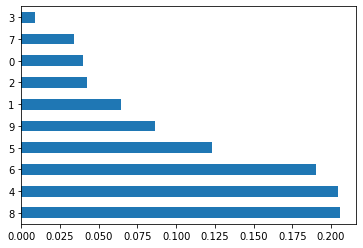

In [214]:
feat_importances_ = pd.Series(model13.feature_importances_)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [215]:
from sklearn.metrics import accuracy_score
ac13 = accuracy_score(y_test,y_pred)
ac13

0.8162162162162162

In [216]:
f1_positive6 = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_positive6

0.8776978417266188

In [217]:
f1_negative6 = metrics.f1_score(y_test, y_pred, pos_label=0)
f1_negative6 

0.6304347826086957

<h3 style = "color:Chocolate"><left><i>X_G_BOOST<i></left></h3>

In [218]:
from xgboost import XGBClassifier
model14 = XGBClassifier()

In [219]:
model14.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [220]:
y_pred = model14.predict(x_test)

In [221]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [222]:
from sklearn.metrics import confusion_matrix
cm14 = confusion_matrix(y_test,y_pred)

In [223]:
cm14

array([[ 29,  22],
       [ 16, 118]], dtype=int64)

In [224]:
from sklearn.metrics import accuracy_score
ac14 = accuracy_score(y_test, y_pred)
ac14

0.7945945945945946

In [225]:
from sklearn import metrics
f1_positive7 = metrics.f1_score(y_test,y_pred, pos_label=1)
f1_positive7

0.8613138686131387

In [226]:
f1_negative7 = metrics.f1_score(y_test,y_pred, pos_label=0)
f1_negative7

0.6041666666666666

<h3 style = "color:Blue"><left><i>F1 Scores and Accuracy Scores of ML Algorithms of IMBALANCED DATA<i></left></h3>

- Generally F1 Score can be considers to Imbalanced Data.

In [227]:
data = {"Accuracy_Score":[ac8,ac9,ac10,ac11,ac12,ac13,ac14],
        "F1_Score_Positive":[f1_positive1,f1_positive2,f1_positive3,f1_positive4,f1_positive5,f1_positive6,f1_positive7],
        "F1_Score_Nagative":[f1_negative1,f1_negative2,f1_negative3,f1_negative4,f1_negative5,f1_negative6,f1_negative7]}
scores2 = pd.DataFrame(data, index = ["LR","KNN","SVM","NB","DT","RF","XGB"])

In [228]:
scores2

,Accuracy_Score,F1_Score_Positive,F1_Score_Nagative
LR,0.827027,0.891892,0.567568
KNN,0.735135,0.817844,0.514851
SVM,0.827027,0.891892,0.567568
NB,0.816216,0.884354,0.552632
DT,0.767568,0.840149,0.574257
RF,0.816216,0.877698,0.630435
XGB,0.794595,0.861314,0.604167


<h3 style = "color:Blue"><left><i>Displaying Classification Evaluation Metrics for Balanced and Imbalanced Data<i></left></h3>

In [229]:
print("Balanced_Data: ","\n",scores1,"\n","Imbalanced_Data: ","\n",scores2 )

Balanced_Data:  
      Accuracy_Score
LR         0.852941
KNN        0.750000
SVM        0.823529
NB         0.808824
DT         0.661765
RF         0.764706
XGB        0.794118 
 Imbalanced_Data:  
      Accuracy_Score  F1_Score_Positive  F1_Score_Nagative
LR         0.827027           0.891892           0.567568
KNN        0.735135           0.817844           0.514851
SVM        0.827027           0.891892           0.567568
NB         0.816216           0.884354           0.552632
DT         0.767568           0.840149           0.574257
RF         0.816216           0.877698           0.630435
XGB        0.794595           0.861314           0.604167


<h3 style = "color:Blue"><left><i>MODEL SELECTION BASED ON ACCURACY SCORE FOR BALANCED DATASET  AND<i></left></h3>
<h3 style = "color:Blue"><left><i>F1_SCORES FOR IMBALANCED DATASET<i></left></h3>

- Frome the above scores, it is clear that: Leniar Regression gives best accuracy score for Balanced dataset and, as well as best f1 score for Imbalanced dataset.


- Since, based on this i would like to proceed with LinearRegression Model to get the output for test dataset.


In [230]:
# Loading the test dataset to predict the output

testdata = pd.read_csv(r"C:\\PYTHON\\PANDAS\\test.csv")
testdata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [231]:
testdata['Dependents'] = testdata['Dependents'].str.replace("+","")

In [232]:
# Deleting the Unwanted columns from the data set

del testdata["Loan_ID"]

In [233]:
del testdata["Dependents"]

In [234]:
testdata

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


<h3 style = "color:BlueViolet"><left><i>Filling Missing Categorical Values with mode()<i></left></h3>

In [235]:
testdata['Gender'].fillna(testdata.Gender.mode()[0], inplace = True)

In [236]:
testdata["Married"].fillna(testdata.Married.mode()[0], inplace = True )

In [237]:
testdata["Self_Employed"].fillna(testdata.Self_Employed.mode()[0], inplace = True )

In [238]:
testdata["Credit_History"].fillna(testdata.Credit_History.mode()[0], inplace = True )

In [239]:
testdata["LoanAmount"].fillna(testdata.LoanAmount.mode()[0], inplace = True )

In [240]:
testdata["Loan_Amount_Term"].fillna(testdata.Loan_Amount_Term.mode()[0], inplace = True )

In [241]:
testdata.isnull().sum()              # Re_Checking Missing values count from each column After Filled them

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<h3 style = "color:BlueViolet"><left><i>Applying Label Encoding On Categorical Features<i></left></h3>

In [242]:
from sklearn.preprocessing import LabelEncoder

In [243]:
encoder = LabelEncoder()

In [244]:
testdata["Gender"] = encoder.fit_transform(testdata["Gender"])   # Encoding "Gender" Column

In [245]:
print(testdata["Gender"].unique())                          # Getting unique values of "Gender"

[1 0]


In [246]:
testdata["Married"] = encoder.fit_transform(testdata["Married"]) # Encoding "Married" Column

In [247]:
print(testdata["Married"].unique())   

[1 0]


In [248]:
testdata["Education"] = encoder.fit_transform(testdata["Education"]) # Encoding "Education" column

In [249]:
print(testdata["Education"].unique())  

[0 1]


In [250]:
testdata["Self_Employed"] = encoder.fit_transform(testdata["Self_Employed"]) # Encoding "Self_Employed"

In [251]:
print(testdata["Self_Employed"].unique())   

[0 1]


In [252]:
testdata["Loan_Amount_Term"] = encoder.fit_transform(testdata["Loan_Amount_Term"]) # Encoding "Loan_Amount_Term"

In [253]:
print(testdata["Loan_Amount_Term"].unique()) 

[10  7  6  3 11  4  1  8  9  2  5  0]


In [254]:
testdata["Property_Area"] = encoder.fit_transform(testdata["Property_Area"]) # Encoding "Property_Area"

In [255]:
print(testdata["Property_Area"].unique())                               # Getting unique values of "Property_Area"

[2 1 0]


In [256]:
testdata.head(3)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,5720,0,110.0,10,1.0,2
1,1,1,0,0,3076,1500,126.0,10,1.0,2
2,1,1,0,0,5000,1800,208.0,10,1.0,2


<h3 style = "color:BlueViolet"><left><i>Feature Scalling<i></left></h3>

In [257]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [258]:
testdata["ApplicantIncome"] = scale.fit_transform(np.array(testdata["ApplicantIncome"]).reshape(-1,1))

In [259]:
testdata["CoapplicantIncome"] = scale.fit_transform(np.array(testdata["CoapplicantIncome"]).reshape(-1,1))

In [260]:
testdata["LoanAmount"] = scale.fit_transform(np.array(testdata["LoanAmount"]).reshape(-1,1))

In [261]:
testdata["Loan_Amount_Term"] = scale.fit_transform(np.array(testdata["Loan_Amount_Term"]).reshape(-1,1))

In [262]:
testdata["Property_Area"] = scale.fit_transform(np.array(testdata["Property_Area"]).reshape(-1,1))

In [263]:
testdata

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0.078865,0.000000,0.157088,0.909091,1.0,1.0
1,1,1,0,0,0.042411,0.062500,0.187739,0.909091,1.0,1.0
2,1,1,0,0,0.068938,0.075000,0.344828,0.909091,1.0,1.0
3,1,1,0,0,0.032263,0.106083,0.137931,0.909091,1.0,1.0
4,1,0,1,0,0.045168,0.000000,0.095785,0.909091,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
362,1,1,1,1,0.055274,0.074042,0.162835,0.909091,1.0,1.0
363,1,1,0,0,0.057329,0.029542,0.166667,0.909091,1.0,1.0
364,1,0,0,0,0.044810,0.083042,0.187739,0.909091,1.0,0.5
365,1,1,0,0,0.068938,0.099708,0.249042,0.909091,1.0,0.0


<h3 style = "color:Blue"><left><i>Applying Logistic Regression model on test dataset<i></left></h3>

##### Here i have choosen logisticregression model to predict the test data, which is applied on Balanced data.

In [264]:
testdata_pred1 = model1.predict(testdata)

In [265]:
testdata_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [266]:
testdata_pred2 = pd.DataFrame(testdata_pred1)

##### Here i have choosen logisticregression model to predict the test data, which is applied on Imbalanced data. 

In [267]:
testdata_pred3 = model8.predict(testdata)

In [268]:
testdata_pred3

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [269]:
testdata_pred4 = pd.DataFrame(testdata_pred3)

<h3 style = "color:Blue"><left><i>Conclusion :<i></left></h3>

- All the machine learning models were performed on given train dataset and also models were performed by doing the dataset balanced.


- For both the balanced and imbalanced datasets retuning methods were done while feature scaling, and applying models, and best steps were kept in.


- Among all the Machine Learning Classification models, Logistic Regression model gave the best accuracy score for balanced dataset and gave best F1 score for imbalanced dataset.


- Based on these scores i have choosen Logistic Regression Model for both the balanced and imbalanced datasets to get the output for test dataset.

###### Next step is Cross Validation Of Classification ML Algorithms, will be in the next session.

###### Thankyou 